In [ ]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Training Data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_sanction_train.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Describe
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Shape
train_data.shape

(614, 13)

<ipython-input-11-3a3b08829564>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=train_data, palette='Set2')


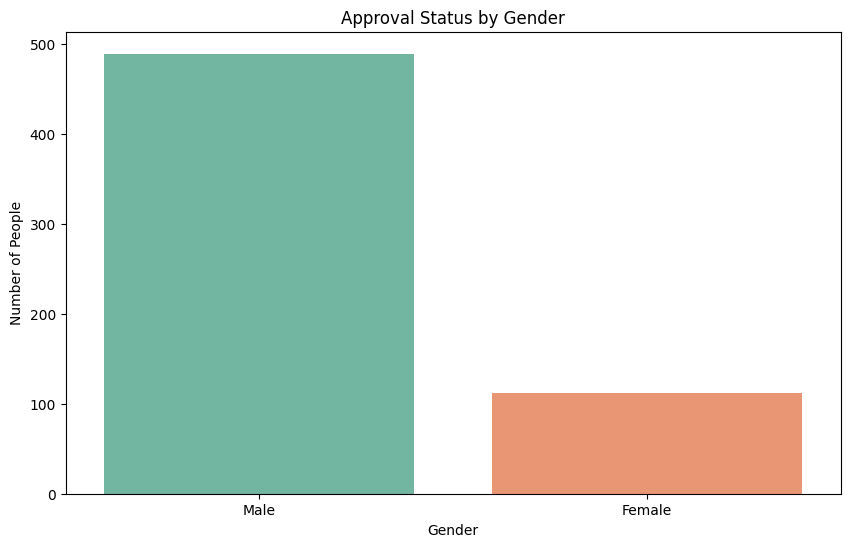

In [ ]:
# Approval Status by Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=train_data, palette='Set2')
plt.title('Approval Status by Gender')
plt.ylabel('Number of People')
plt.show()

<ipython-input-12-a1864577bc05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=train_data, palette='Set1')


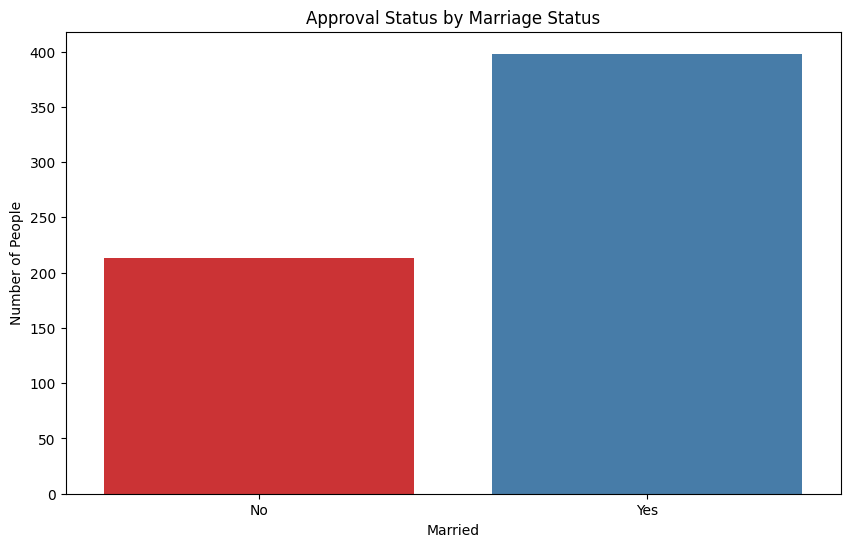

In [ ]:
# Approval Status by Marriage Status
plt.figure(figsize=(10,6))
sns.countplot(x='Married', data=train_data, palette='Set1')
plt.title('Approval Status by Marriage Status')
plt.ylabel('Number of People')
plt.show()

<ipython-input-13-527cdbebdd4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=train_data, palette='Set3')


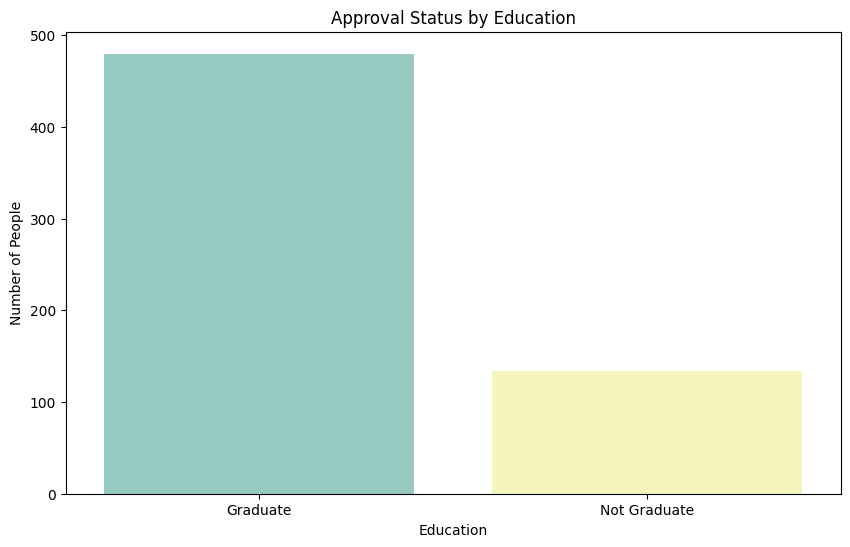

In [ ]:
# Approval Status by Marriage Status
plt.figure(figsize=(10,6))
sns.countplot(x='Education', data=train_data, palette='Set3')
plt.title('Approval Status by Education')
plt.ylabel('Number of People')
plt.show()

In [ ]:
# Data Cleaning
train_data_clean = train_data.dropna(axis=0)
train_data_clean = train_data_clean.drop(columns=['Loan_ID'], axis=1)

columns_to_encode = ['Dependents','Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
train_data_clean = pd.get_dummies(train_data_clean, columns=columns_to_encode)

In [ ]:
# Identifying Training and Testing Sets
X = train_data_clean.drop(columns=['Loan_Status'], axis=1)
y = train_data_clean['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on training set: {:.0%}'.format(accuracy))

Accuracy on training set: 82%


In [ ]:
# Load New Dataset
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_test_data.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# Preform identical cleaning procedure as training set
test_data_clean = test_data.dropna(axis=0)
test_data_clean = test_data_clean.drop(columns=['Loan_ID'], axis=1)
test_data_clean = pd.get_dummies(test_data_clean, columns=columns_to_encode)

In [ ]:
# Making Predictions of the Test Data
test_data_clean['Predictions'] = model.predict(test_data_clean)

# Adding back the 'Loan_ID' column
test_data_clean.insert(0, 'Loan_ID', test_data['Loan_ID'])

In [ ]:
# Printing Out the Results
test_data_clean.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Predictions
0,LP001015,5720,0,110.0,360.0,1.0,True,False,False,False,...,False,True,True,False,True,False,False,False,True,Y
1,LP001022,3076,1500,126.0,360.0,1.0,False,True,False,False,...,False,True,True,False,True,False,False,False,True,Y
2,LP001031,5000,1800,208.0,360.0,1.0,False,False,True,False,...,False,True,True,False,True,False,False,False,True,Y
4,LP001051,3276,0,78.0,360.0,1.0,True,False,False,False,...,True,False,False,True,True,False,False,False,True,Y
5,LP001054,2165,3422,152.0,360.0,1.0,True,False,False,False,...,False,True,False,True,False,True,False,False,True,Y


In [ ]:
# Loan_ID and Predicition
test_data_clean[['Loan_ID', 'Predictions']]

,Loan_ID,Predictions
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
4,LP001051,Y
5,LP001054,Y
...,...,...
361,LP002969,Y
362,LP002971,Y
363,LP002975,Y
365,LP002986,Y


In [25]:
!cp "/content/drive/MyDrive/Colab Notebooks/Predicting Credit Loan Quality.ipynb" ./
!jupyter nbconvert --to html "Predicting Credit Loan Quality.ipynb"

[NbConvertApp] Converting notebook Predicting Credit Loan Quality.ipynb to html
[NbConvertApp] Writing 733861 bytes to Predicting Credit Loan Quality.html
